# Financial Data Analytics using Python




## Loading Packages

In [ ]:
!pip install yfinance
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Knowing how to calculate the returns is a valuable skill, but you’ll often see that these numbers don’t really say much when you don’t compare them to other stock. That’s why you’ll often see examples where two or more stocks are compared. In the rest of this section, you’ll focus on getting more data from Yahoo! Finance so that you can calculate the daily percentage change and compare the results.

Let’s start! Get more data from Yahoo! Finance first. You can easily do this by making a function that takes in the ticker or symbol of the stock, a start date and an end date. The next function that you see, data(), then takes the ticker to get your data from the startdate to the enddate and returns it so that the get() function can continue. You map the data with the right tickers and return a DataFrame that concatenates the mapped data with tickers.

Check out the code below, where the stock data from Apple, Microsoft, IBM, and Google are loaded and gathered into one big DataFrame:

**STARTS FROM HERE**

In [ ]:
#f 2020.01.01-2023.01.01
from pandas_datareader import data as pdr
import yfinance

def get(tickers, startdate, enddate):
    def data(ticker):
        return (yf.download(ticker, start=startdate, end=enddate))
    datas = map (data, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL', 'AMZN', 'TSLA','PEP','MSFT']
all_data = get(tickers, datetime.datetime(2020, 1, 1), datetime.datetime(2023, 1, 1))
all_data.tail()




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Ticker Date                                                                     
MSFT   2022-12-23  236.110001  238.869995  233.940002  238.729996  237.614105   
       2022-12-27  238.699997  238.929993  235.830002  236.960007  235.852386   
       2022-12-28  236.889999  239.720001  234.169998  234.529999  233.433731   
       2022-12-29  235.649994  241.919998  235.649994  241.009995  239.883453   
       2022-12-30  238.210007  239.960007  236.660004  239.820007  238.699020   

                     Volume  
Ticker Date                  
MSFT   2022-12-23  21207000  
       2022-12-27  16688600  
       2022-12-28  17457100  
       2022-12-29  19770700  
       2022-12-30  21938500

Second approach with the list of data as csv file

Plot the return for all!

<ipython-input-5-b88991527826>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')


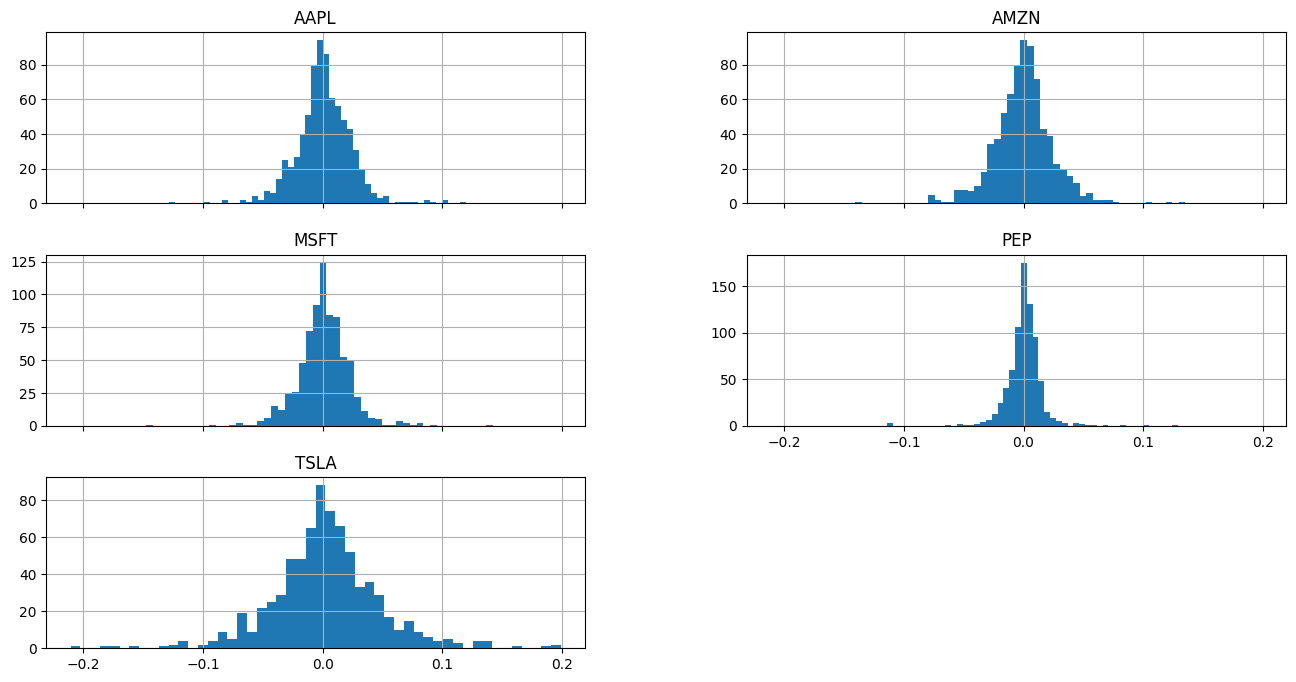

In [ ]:
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(16,8))

# Show the resulting plot
plt.show()

In [ ]:
all_data.shape

(3780, 6)

Another useful plot is the scatter matrix with scatter_matrix() function. As arguments, you pass the daily_pct_change and as a diagonal, you set that you want to have a Kernel Density Estimate (KDE) plot. Additionally, you can set the transparency with the alpha argument and the figure size with figsize..

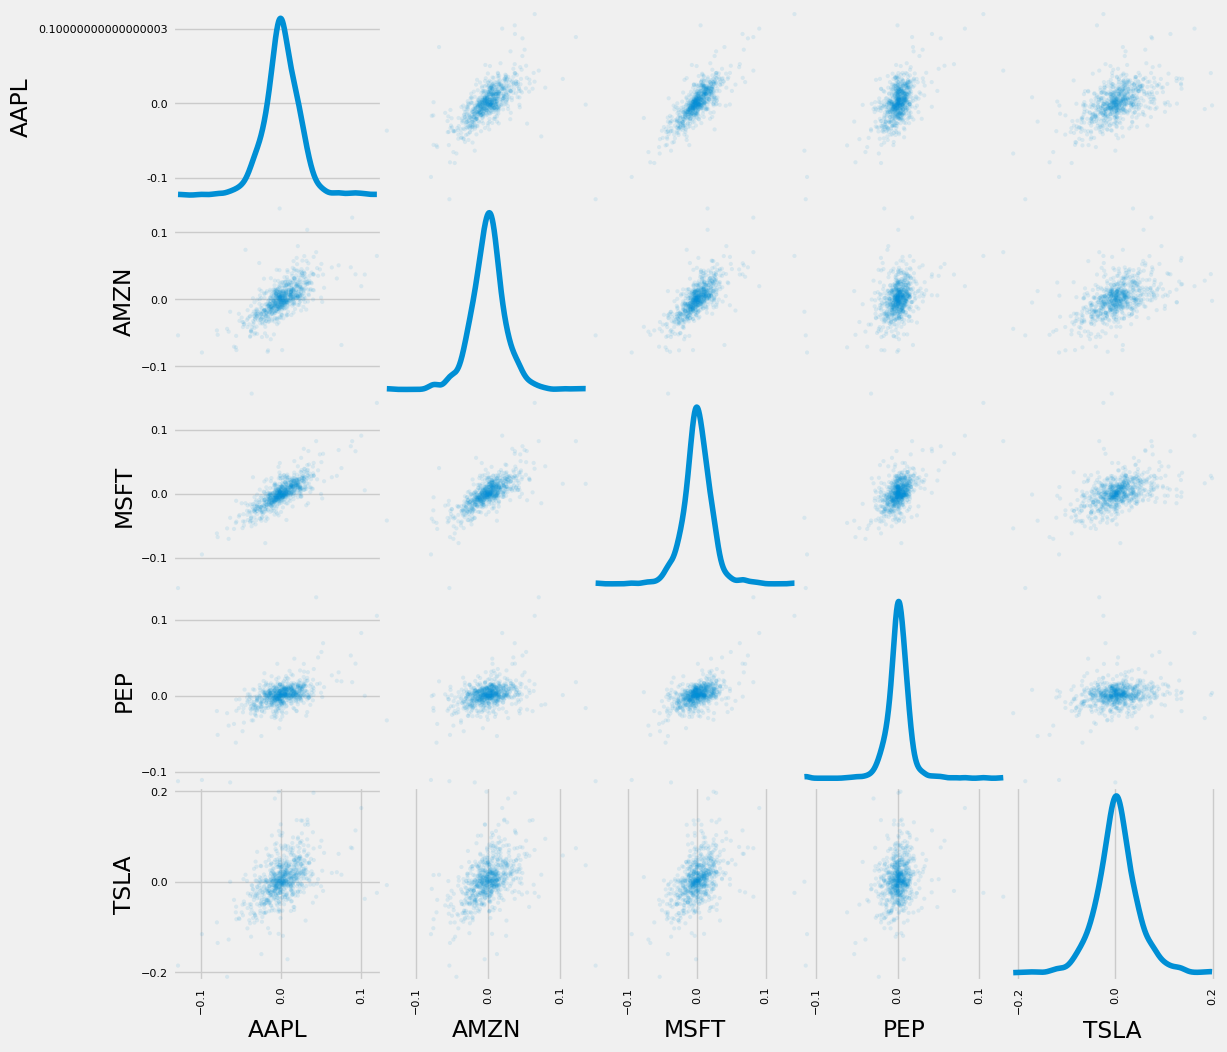

In [ ]:
# Plot a scatter matrix with the `daily_pct_change` data
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

# Show the plot
plt.show()

Congratulations! You’ve successfully made it through the first common financial analysis, where you explored returns! Now it’s time to move on to the second one, which are the moving windows.

**Strategy** **############################################**

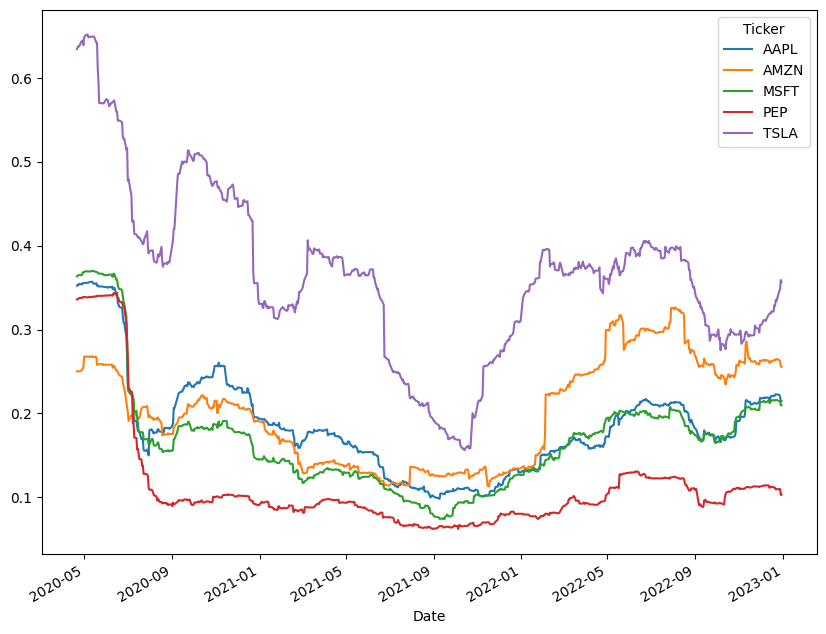

In [ ]:
##The volatility is calculated by taking a rolling window standard deviation on the percentage change in a stock.
# You can clearly see this in the code because you pass daily_pct_change and the min_periods to rolling_std().

# Define the minumum of periods to consider
min_periods = 75

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods)

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

#if you take the window wider and make min_periods larger, your result will become less representative.
#If you make it smaller and make the window more narrow, the result will come closer to the standard deviation.

In [ ]:
apple = yf.download('AAPL', start="2020-01-01", end="2023-01-11")
tesla = yf.download('TSLA', start="2020-01-01", end="2023-01-11")
amazon = yf.download('AMZN', start="2020-01-01", end="2023-01-11")
pepsico = yf.download('PEP', start="2020-01-01", end="2023-01-11")
micro = yf.download('MSFT', start="2020-01-01", end="2023-01-11")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


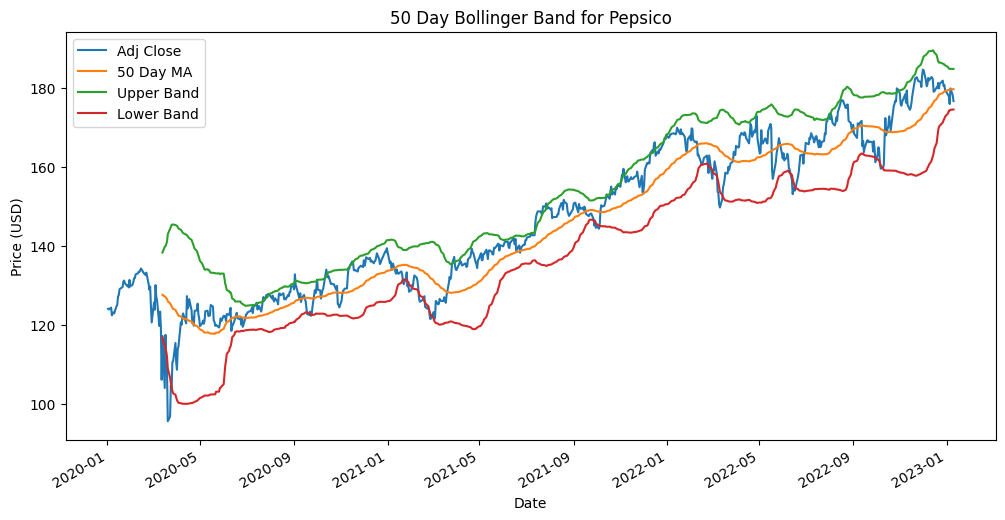

In [ ]:

# Calculate 20 Day Moving Average, Std Deviation, Upper Band and Lower Band
for item in (apple, tesla, amazon, pepsico,micro):
    item['50 Day MA'] = item['Adj Close'].rolling(window=50).mean()

    # set .std(ddof=0) for population std instead of sample
    item['50 Day STD'] = item['Adj Close'].rolling(window=50).std()

    item['Upper Band'] = item['50 Day MA'] + (item['50 Day STD'] * 2)
    item['Lower Band'] = item['50 Day MA'] - (item['50 Day STD'] * 2)

# Simple 30 Day Bollinger Band for Facebook (2016-2017)
pepsico[['Adj Close', '50 Day MA', 'Upper Band', 'Lower Band']].plot(figsize=(12,6))
plt.title('50 Day Bollinger Band for Pepsico')
plt.ylabel('Price (USD)')
plt.show();


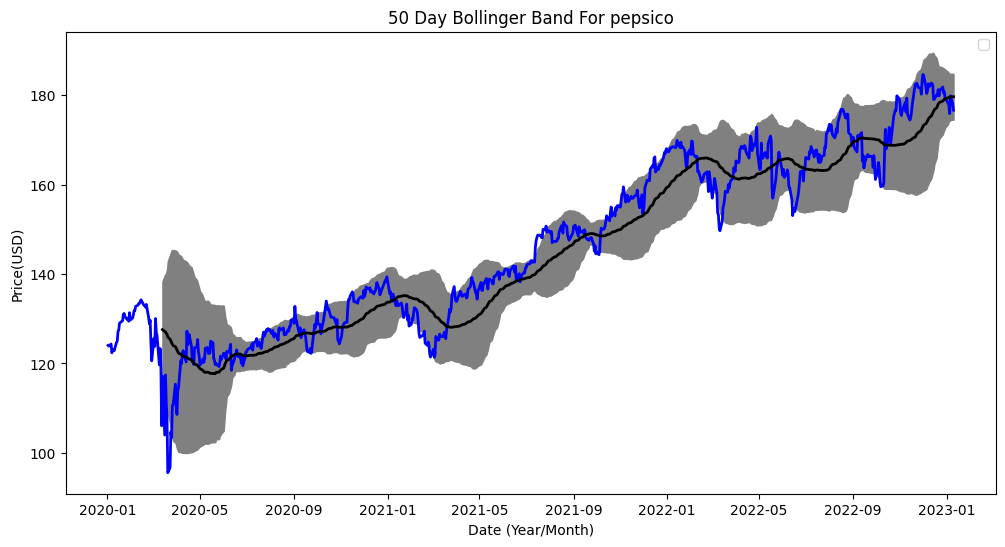

In [ ]:
# set style, empty figure and axes
#plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

# Get index values for the X axis for facebook DataFrame
x_axis = pepsico.index.get_level_values(0)

# Plot shaded 21 Day Bollinger Band for Facebook
ax.fill_between(x_axis, pepsico['Upper Band'], pepsico['Lower Band'], color='grey')

# Plot Adjust Closing Price and Moving Averages
ax.plot(x_axis, pepsico['Adj Close'], color='blue', lw=2)
ax.plot(x_axis, pepsico['50 Day MA'], color='black', lw=2)

# Set Title & Show the Image
ax.set_title('50 Day Bollinger Band For pepsico')
ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price(USD)')
ax.legend()
plt.show();


### Volatility is calculated as the standard deviations from the expected values. Highly volatile stocks may promise more returns but are riskier. Volatility can also be understood with the help of Bollinger bands; it incorporates the standard deviations and volatility measures. The bands expand out in an area where the market is highly volatile.

In [ ]:
#CALCULATING THE STD DEVIATIONS WRT TO RETURNS

#APPLE
daily_close = apple['Adj Close']
returns= daily_close.pct_change()
risk_measure_a = np.std(returns)
print('APPLE',risk_measure_a)
#MICROSOFT
daily_close = micro['Adj Close']
returns= daily_close.pct_change()
risk_measure_m = np.std(returns)
print('MICROSOFT',risk_measure_m)

#PEPSICO
daily_close = pepsico['Adj Close']
returns= daily_close.pct_change()
risk_measure_p = np.std(returns)
print('PEPSI',risk_measure_p )

#TESLA
daily_close = tesla['Adj Close']
returns= daily_close.pct_change()
risk_measure_t = np.std(returns)
print('TESLA',risk_measure_t)

#AMAZON
daily_close = amazon['Adj Close']
returns= daily_close.pct_change()
risk_measure_am = np.std(returns)
print('AMAZON',risk_measure_am)

inverse_ratio_apple = 1 / risk_measure_a
inverse_ratio_tesla = 1 / risk_measure_t
inverse_ratio_amazon = 1 / risk_measure_am
inverse_ratio_pepsi= 1 / risk_measure_p
inverse_ratio_micro = 1 / risk_measure_m


# Print the inverse ratios
print("Inverse Ratio for apple:", inverse_ratio_apple)
print("Inverse Ratio for tesla:", inverse_ratio_tesla)
print("Inverse Ratio for amazon:", inverse_ratio_amazon)
print("Inverse Ratio for pepsi:", inverse_ratio_pepsi)
print("Inverse Ratio for microsoft:", inverse_ratio_micro)


APPLE 0.02324350139894581
MICROSOFT 0.021889016477056746
PEPSI 0.015948676841735406
TESLA 0.045594947655659385
AMAZON 0.024597911788694343
Inverse Ratio for apple: 43.022777972915655
Inverse Ratio for tesla: 21.932254589963915
Inverse Ratio for amazon: 40.653857473365626
Inverse Ratio for pepsi: 62.70112623908355
Inverse Ratio for microsoft: 45.685012894396735


In [ ]:
inverse_ratio_apple = 1 / risk_measure_a
inverse_ratio_tesla = 1 / risk_measure_t
inverse_ratio_amazon = 1 / risk_measure_am
inverse_ratio_pepsi= 1 / risk_measure_p
inverse_ratio_micro = 1 / risk_measure_m


#Normalization:
inverse_ratio_sum = inverse_ratio_apple + inverse_ratio_tesla + inverse_ratio_amazon
+ inverse_ratio_pepsi + inverse_ratio_micro
# Normalize the weights
weight_apple = inverse_ratio_apple / inverse_ratio_sum
weight_tesla = inverse_ratio_tesla / inverse_ratio_sum
weight_amazon = inverse_ratio_amazon / inverse_ratio_sum
weight_pepsi = inverse_ratio_pepsi / inverse_ratio_sum
weight_micro = inverse_ratio_micro / inverse_ratio_sum

# Print the normalized weights
print("Normalized Weight for Apple:", weight_apple)
print("Normalized Weight for Tesla:", weight_tesla)
print("Normalized Weight for Amazon:", weight_amazon)
print("Normalized Weight for Pepsi:", weight_pepsi)
print("Normalized Weight for Microsoft:", weight_micro)


Normalized Weight for Apple: 0.4073783746628731
Normalized Weight for Tesla: 0.20767432156929896
Normalized Weight for Amazon: 0.38494730376782804
Normalized Weight for Pepsi: 0.59371068304538
Normalized Weight for Microsoft: 0.43258681043534825


In [ ]:
weights = {
    'AAPL': 0.4073783280624542,
    'TSLA': 0.2076743378996351,
    'AMZN': 0.3849473340379107,
    'PEP': 0.5937105432873606,
    'MSFT': 0.4325866249911054
}

In [ ]:
all_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
# all_data.reset_index(inplace=True)
# all_data['Name'] = all_data['Ticker']
# all_data.drop('Ticker', axis=1, inplace=True)

# # Print the modified dataframe


In [ ]:

#all_data.loc[all_data['Name'] == 'AAPL'].count()

In [ ]:
import pandas as pd

# Dataframe named 'all_data' with columns: 'Name', 'Date', 'Adjusted_Close'
# Dictionary named 'weights' containing the weights for each stock

# Calculate the weighted sum for each date
result_df = all_data.groupby('Date').apply(lambda x: (x['Adj Close'] * weights[x['Name'].iloc[0]]).sum()).reset_index()
result_df.columns = ['Date', 'Weighted_Sum']

# Print the dataframe with the date and weighte
result_df.shape

(756, 2)

In [ ]:

daily_close = result_df['Weighted_Sum']
returns= daily_close.pct_change()

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

0.6258796821436622


##Moving Windows
Moving windows are there when you compute the statistic on a window of data represented by a particular period of time and then slide the window across the data by a specified interval. That way, the statistic is continually calculated as long as the window falls first within the dates of the time series.

There are a lot of functions in Pandas to calculate moving windows, such as rolling_mean(), rolling_std()

In [ ]:
# Isolate the adjusted closing prices
adj_close_px = result_df['Weighted_Sum']

# Calculate the moving average for 40 window
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
moving_avg[-10:]

746    346.963912
747    345.891707
748    344.618181
749    343.238494
750    341.839254
751    340.583548
752    338.939093
753    337.329007
754    336.070238
755    335.143534
Name: Weighted_Sum, dtype: float64

try out some of the other standard moving windows functions that come with the Pandas package, such as rolling_max(), rolling_var() or rolling_median(), in the IPython console. Note that you can also use rolling() in combination with max(), var() or median() to accomplish the same results!

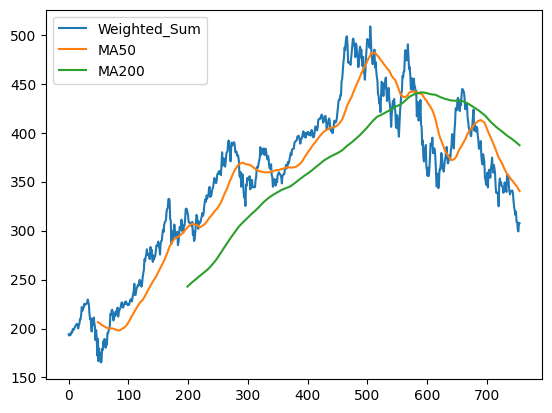

In [ ]:
# Short moving window rolling mean
result_df['MA50'] = adj_close_px.rolling(window=50).mean()

# Long moving window rolling mean
result_df['MA200'] = adj_close_px.rolling(window=200).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
result_df[['Weighted_Sum', 'MA50', 'MA200']].plot()

plt.show()

##Building A Trading Strategy With Python

Common Trading Strategies:
 In general, there are two common trading strategies: the momentum strategy (divergence or trend trading) and the reversion strategy.

 Some examples of momentum strategy are the moving average crossover, the dual moving average crossover, and turtle trading (buy futures on a 20-day high and sell on a 20-day low)

The reversion strategy is also known as convergence or cycle trading. This strategy departs from the belief that the movement of a quantity will eventually reverse (stocks return to their mean) . Another example of this strategy,besides the mean reversion strategy, is the pairs trading mean-reversion.  


##A Simple Trading Strategy
The strategy that you’ll be developing is simple: you create two separate Simple Moving Averages (SMA) of a time series with differing lookback periods, let’s say, 40 days and 100 days. If the short moving average exceeds the long moving average then you go long, if the long moving average exceeds the short moving average then you exit.

In [ ]:
# Initialize the short and long windows
short_window = 50
long_window = 100

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=result_df.index)  #make an empty signals DataFrame, but do make sure to copy the index of your aapl data
signals['signal'] = 0.0  #Create a column in your empty signals DataFrame that is named signal
#and initialize it by setting the value for all rows in this column to 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = result_df['Weighted_Sum'].rolling(window=short_window, min_periods=1, center=False).mean()

#1 as the minimum number of observations in the window that are required to have a value, and False,
#so that the labels are not set at the center of the window.
 #Next, don’t forget to also chain the mean() function so that you calculate the rolling mean.


# Create long simple moving average over the long window
signals['long_mavg'] = result_df['Weighted_Sum'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:]
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)

# Generate trading orders
#you take the difference of the signals in order to generate actual trading orders.
signals['positions'] = signals['signal'].diff()

# Print `signals`
print(signals)

     signal  short_mavg   long_mavg  positions
0       0.0  194.076069  194.076069        NaN
1       0.0  193.439766  193.439766        0.0
2       0.0  193.691348  193.691348        0.0
3       0.0  193.579332  193.579332        0.0
4       0.0  193.921567  193.921567        0.0
..      ...         ...         ...        ...
751     0.0  335.182027  389.306710        0.0
752     0.0  333.077133  388.795079        0.0
753     0.0  331.054723  388.311101        0.0
754     0.0  328.609751  387.799230        0.0
755     0.0  326.137944  387.222553        0.0

[756 rows x 4 columns]


plot all of this (the short and long moving averages, together with the buy and sell signals) with Matplotlib:

Important to grasp here is what the positions and the signal columns mean in this DataFrame.

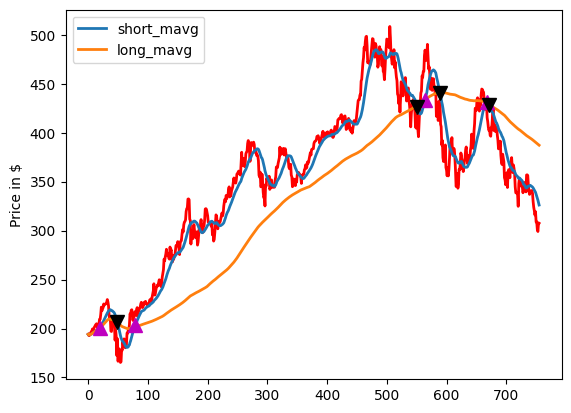

In [ ]:
# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
result_df['Weighted_Sum'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index,
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')

# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index,
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

##Backtesting The Trading Strategy

Backtesting is, besides just “testing a trading strategy”, testing the strategy on relevant historical data to make sure that it’s an actual viable strategy before you start making moves.

#Backtesting Pitfalls?
overfit a model (optimization bias),

when you ignore strategy rules because you think it’s better like that (interference),

and when you accidentally introduce information into past data (lookahead bias).

#Backtesting Components
Backtest usually consists of some four essential components

A data handler, which is an interface to a set of data,

A strategy, which generates a signal to go long or go short based on the data,

A portfolio, which generates orders and manages Profit & Loss (also known as “PnL”), and

An execution handler, which sends the order to the broker and receives the “fills” or signals that the stock has been bought or sold.

#Python Tools
the IbPy and ZipLine libraries. The former offers you a Python API for the Interactive Brokers online trading system: you’ll get all the functionality to connect to Interactive Brokers, request stock ticker data, submit orders for stocks,… The latter is an all-in-one Python backtesting framework that powers Quantopian, which you’ll use in this tutorial.


#Backtesting With Zipline & Quantopian
Pandas is good but it’s common to use a backtesting platform, such as Quantopian, for your backtesters. Quantopian is a free, community-centered, hosted platform for building and executing trading strategies. It’s powered by zipline, a Python library for algorithmic trading.

#Implementation Of A Simple Backtester


In [ ]:
# Set the initial capital
initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)
# Once again, you copy the index from another DataFrame;
#In this case, this is the signals DataFrame because you want to consider the time frame for which you have generated the signals.

# Buy a 100 shares
positions['AAPL'] = 500*signals['signal']

# Initialize the portfolio with value owned
#A new DataFrame portfolio is created to store the market value of an open position
portfolio = positions.multiply(result_df['Weighted_Sum'], axis=0)

# Store the differences in positions (or number of stock)
pos_diff = positions.diff()

# Add `holdings` to portfolio
#you create a new column to the portfolio DataFrame with name holdings,
# which stores the value of the positions or shares you have bought, multiplied by the ‘Adj Close’ price.
portfolio['holdings'] = (positions.multiply(result_df['Weighted_Sum'], axis=0)).sum(axis=1)

# Add `cash` to portfolio which is the capital that you still have left to spend
portfolio['cash'] = initial_capital - (pos_diff.multiply(result_df['Weighted_Sum'], axis=0)).sum(axis=1).cumsum()

# Add `total` to portfolio which contains the sum of your cash and the holdings that you own
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio in which you’ll store the returns
portfolio['returns'] = portfolio['total'].pct_change()

Visualize the portfolio value or portfolio['total'] over the years

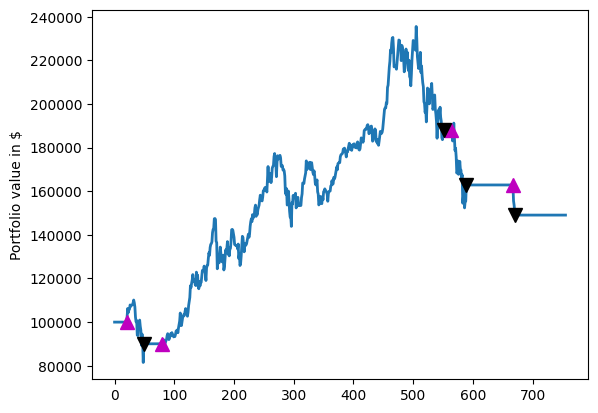

In [ ]:

import matplotlib.pyplot as plt

fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

# Plot the "buy" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == 1.0].index,
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')

# Plot the "sell" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == -1.0].index,
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

#Evaluating Moving Average Crossover Strategy
You can easily use Pandas to calculate some metrics to further judge your simple trading strategy.
1. Sharpe ratio (Usually, a ratio greater than 1 is acceptable by investors, 2 is very good and 3 is excellent)



In [ ]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

0.6055056437750297



2. Maximum Drawdown, which is used to measure the largest single drop from peak to bottom in the value of a portfolio, so before a new peak is achieved. In other words, the score indicates the risk of a portfolio chosen based on a certain strategy.


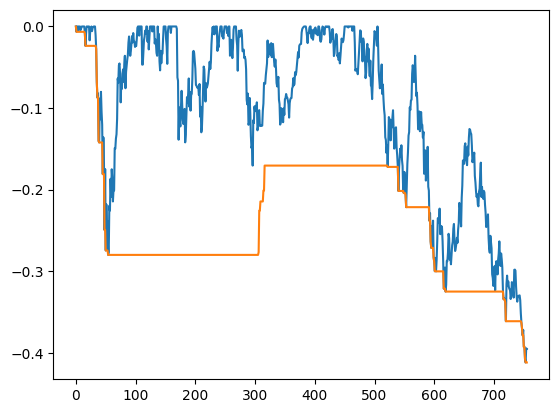

In [ ]:
# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day
rolling_max = result_df['Weighted_Sum'].rolling(window, min_periods=1).max()
daily_drawdown = result_df['Weighted_Sum']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()

# Show the plot
plt.show()

In [ ]:
df=all_data
#df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.dtypes

Open                 float64
High                 float64
Low                  float64
Close                float64
Adj Close            float64
Volume                 int64
Name                  object
Daily Return         float64
Cumulative Return    float64
dtype: object

In [ ]:
df=all_data

In [ ]:
df.reset_index(inplace=True)

#all_data.drop('Ticker', axis=1, inplace=True)

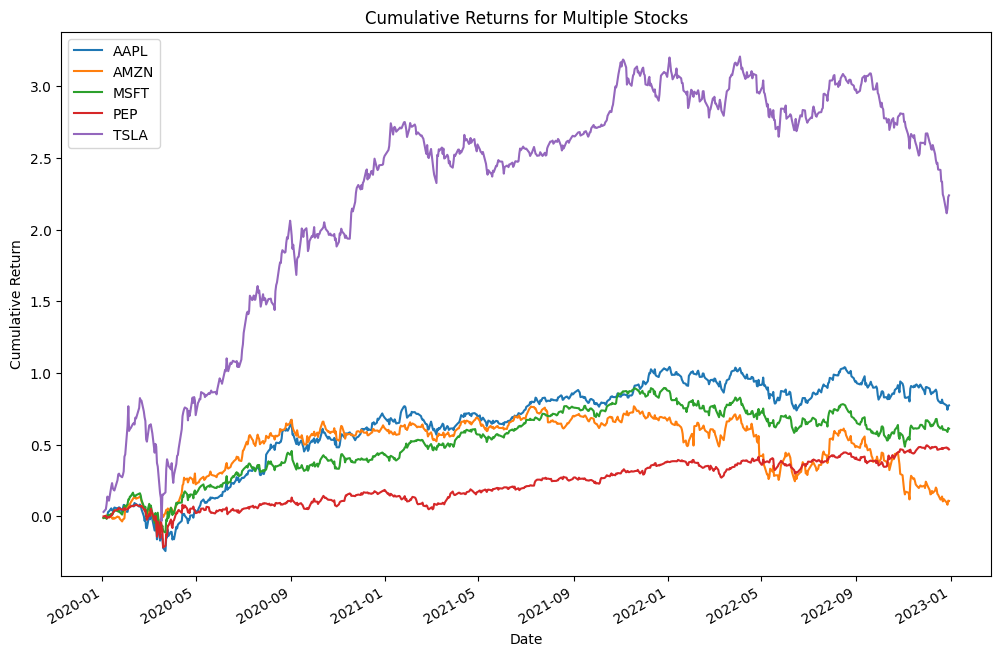

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the daily returns
df['Daily Return'] = df.groupby('Ticker')['Adj Close'].pct_change()

# Calculate cumulative returns
df['Cumulative Return'] = (1 + df.groupby('Ticker')['Daily Return'].cumsum()) - 1

# Pivot the DataFrame to have stocks as columns
df_pivot = df.pivot(index='Date', columns='Ticker', values='Cumulative Return')

# Plot cumulative returns
df_pivot.plot(figsize=(12, 8))
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Returns for Multiple Stocks')
plt.legend(loc='upper left')
plt.show()
